# Clustering Jerárquico y Dendrogramas

## Clustering Jerárquico

Notación a utilizar:
* $X$ conjunto de obsevaciones, matriz(nxm)
* $n$ número de datos
* $m$ número de rasgos o características
* $w$ array de enlace del cluster con información de uniones
* $k$ número de clusters

### Ejemplo 1

In [287]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [432]:
np.random.seed(4711)
# crea distribuciones gausianas multivariadas ([medias], [cov_matrix], size)
a = np.random.multivariate_normal([10,0], [[3, 1], [1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3, 1], [1,4]], size = [50,])

In [433]:
np.random.multivariate_normal?

In [434]:
x = np.concatenate((a,b))
x.shape

(150, 2)

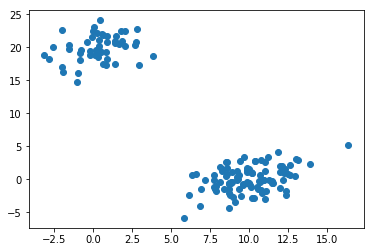

In [291]:
plt.scatter(x[:,0], x[:,1])
plt.show()

**Nota:** Con la función `multivariate_normal` se construyó un conjunto de datos aleatorios que muestran la acumulación de puntos alrededor de los puntos (0,20) y (10,0) con diferentes desviaciones estandar hacia ambos ejes en cada caso.

### Matriz de enlace 

In [292]:
# crea la matriz de enlace utilizando el método 'ward'
# refiere al algoritmo de minimización de la varianza de Ward

z = linkage(x, "ward") # datos y tipo de enlace

In [293]:
linkage?

In [294]:
z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

El primer renglón de la matriz de enlace describe la agrupación de **dos elementos**, esto es que los puntos en los renglones 52 y 53 en la matriz de datos fueron agrupados en la primera iteración, se añade además la distancia entre ellos y el número de elementos agrupados.

In [295]:
z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [296]:
x[[52,53]]

array([[10.1880312 ,  0.91403903],
       [10.21253729,  0.88053415]])

In [297]:
z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [298]:
x[[14,79]]

array([[10.95901841, -0.12752032],
       [10.91085638, -0.16183757]])

Observemos que la agrupación de **tres elementos** en la matriz de enlace aparece como sigue: 

In [299]:
z[13]

array([ 62.        , 152.        ,   0.17259953,   3.        ])

Los clusters en la matriz de enlace cuyo índice es mayor a longitud del conjunto de datos corresponden a los nuevos clusters creados por el algoritmo, función `linkage()`. Para observar estos nuevos clusters hacemos:

In [300]:
z[152-len(x)] # cluster 152

array([33.        , 68.        ,  0.07106779,  2.        ])

In [301]:
x[[33,68,62]]

array([[ 9.83913054, -0.48729797],
       [ 9.8934927 , -0.44152257],
       [ 9.97792822, -0.56383202]])

In [302]:
z[14]

array([ 41.        , 158.        ,   0.17790138,   3.        ])

In [303]:
w[158-len(x)] # cluster 158

array([15.        , 69.        ,  0.11428971,  2.        ])

In [304]:
x[[15,69,41]]

array([[ 8.72437412, -0.73101911],
       [ 8.69529949, -0.62048946],
       [ 8.81582877, -0.56394025]])

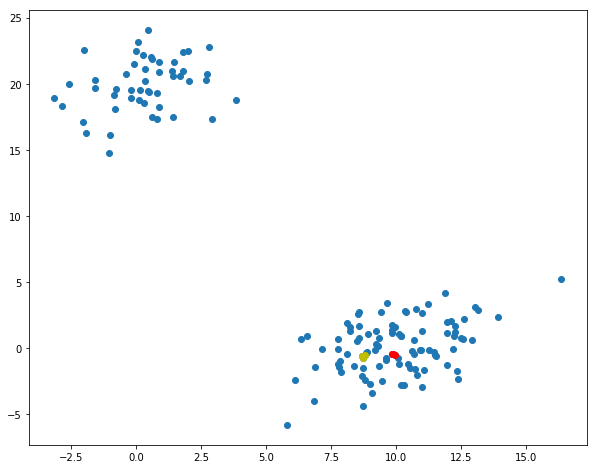

In [305]:
idx1 = [33, 62, 68]
idx2 = [15,69,41]
plt.figure(figsize = (10, 8))
plt.scatter(x[:,0], x[:,1]) # pinta todos los puntos
plt.scatter(x[idx1,0], x[idx1,1], color = 'r')
plt.scatter(x[idx2,0], x[idx2,1], color = 'y')
plt.show()

### Coeficiente cofenético

Se dice que una matriz de distancias D es **ultramétrica** si para todos los elementos del conjunto de datos X se verifica que:
1. Disimilaridad o casi-metrica:
    - $\delta_{ij} = \delta_{ji} \: \forall i,j$
    - $\delta_{ii} = 0 \: \forall i$

2. Desigualdad ultramétrica:
    * $\delta_{ij} \le max(\delta_{ik}, \delta_{k,j}) \: \forall i,j,k$

Puede demostrarse que a cada dendrograma le corresponde una matriz de distancias ultramétrica y viceversa.

En general, una matriz de distancias D obtenida a partir de una matriz de datos multivariantes X, no cumple la propiedad ultramétrica. Esto da lugar al problema de aproximar la matriz de distancias $D = \delta_{ij}$ con una matriz ultramétrica $U = u_{ij}$ según algún criterio de proximidad adecuado.

La medida de proximidad que se utiliza es la correlación **cofenética** que es el coeficiente de correlación lineal (de Pearson) entre los $n(n-1)/2$ pares de distancias $ (\delta_{ij}, u_{ij})$ para $1 \le i<j \le n$. 

Este coeficiente vale 1 cuando ambas matrices son proporcionales (iguales). Esto equivale a decir que la matriz D ya cumple la propiedad ultramétrica y, por tanto, la clasificación es exacta.

Así, el coeficiente cofenético sirve para evaluar la calidad del agrupamiento.

In [306]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [307]:
c, coph_dist = cophenet(w, pdist(x))
c

0.9800148387574268

La calidad del agrupamiento que se ha hecho es casi exacta.

## Dendrograma

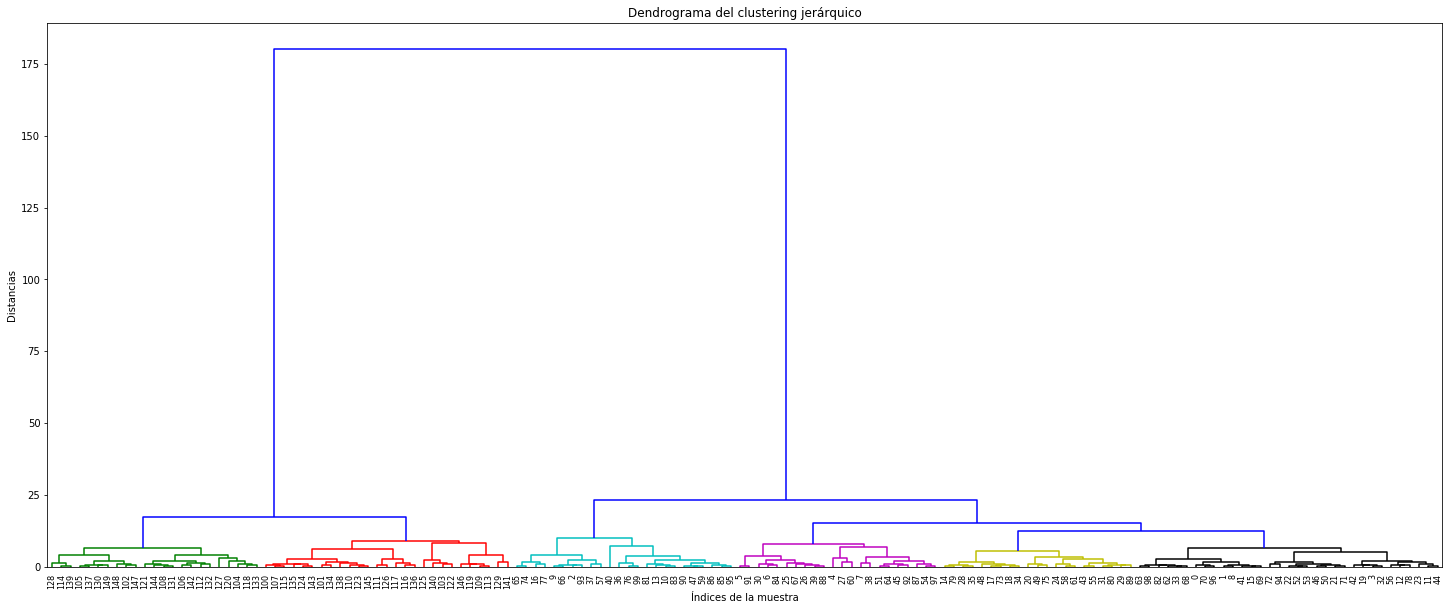

In [328]:
plt.figure(figsize = (25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias")
dendrogram(z,                    # matriz de enlace 
           leaf_rotation = 90,   # orienta las etiquetas
           leaf_font_size = 8.0,  # tamaño de letra
           color_threshold = 10) # define un umbral(distancia) máximo para colorear las agrupaciones
plt.show()

Notemos que en el eje horizontal se encuentran las etiquetas de los elementos que se agrupan, y en el eje horizontal se encuentran las distancias con las que se agrupan cada elemento. Las líneas horizontales marcan uniones de clusters, las líneas verticales marcan los elementos que se unen para formar un nuevo cluster. Las alturas de las líneas verticales muestran las distanciad de unión.

La información de los últimos agrupamientos y la distancia en la que hacen la podemos ver al final de la matriz de enlace.

In [309]:
z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

Observamos que los últimos agrupamientos ofrecen la caracterización general de los datos, en este caso, el conjunto total de datos puede agruparse en dos clases principales.

Sin embargo para este diagrama, la descripción de agrupamientos a niveles mas bajos no es proporcionada con claridad por el dendrograma, de tal modo, se procede a truncar el dendrograma.

### Truncar el dendrograma

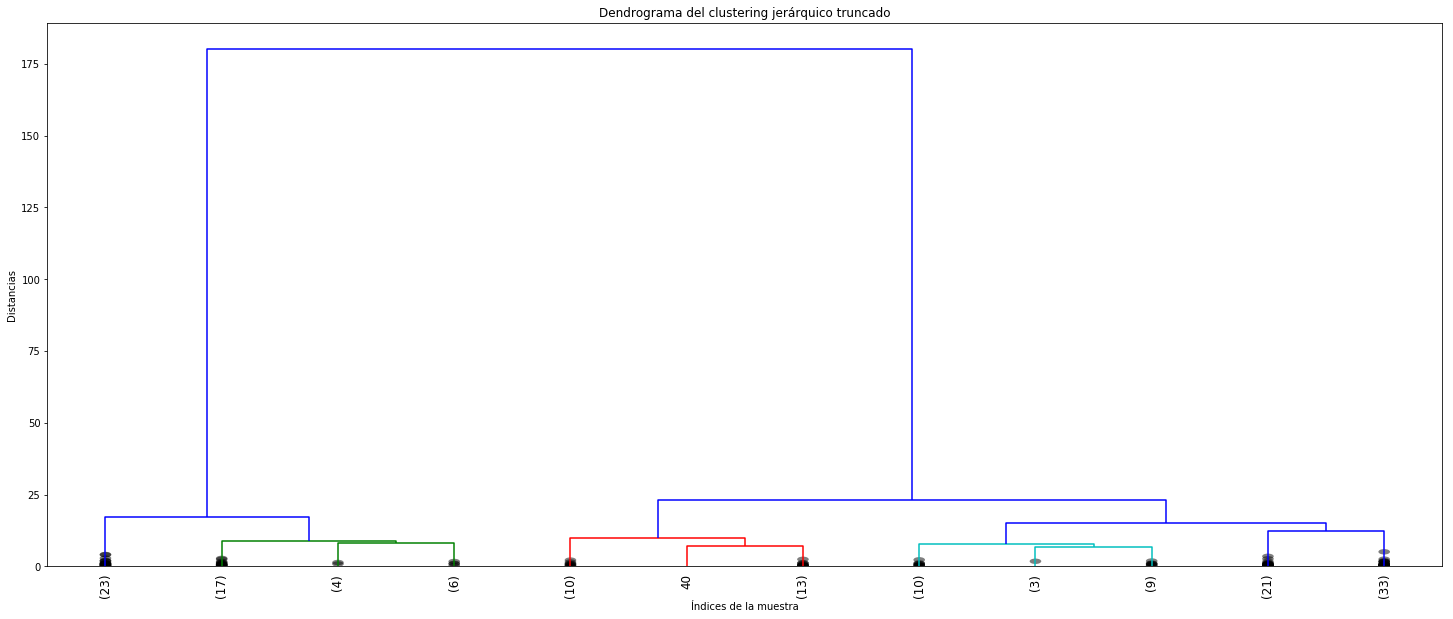

In [326]:
plt.figure(figsize = (25,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias")
ddata = dendrogram(w, leaf_rotation = 90.0, leaf_font_size = 12.0,
           color_threshold = 10,    # colorea agrupaciones con distancia 10 o inferior
           truncate_mode = 'lastp', # activa la vista de los últimos clusters
           p = 12,                  # muestra los últimpos 12  
           show_leaf_counts = True, # muestra etiquetas de los elementos agrupados
           show_contracted = True)  # muestra etiquetas de los elementos contraídas
plt.show()

Se observa en el dendrograma 12 clusters, donde vemos en el eje horizontal, 23 elementos agrupados, 17 elementos agrupados, etc., así como el elemento 40 sin agrupar aún. El umbral de color elegido ayuda a identificar los clusters generados casi al final del proceso de agrupamiento, descartando los clusters iniciales.  

In [312]:
z[-12:,]

array([[279.        , 281.        ,   6.59359584,  23.        ],
       [274.        , 275.        ,   6.65621609,  12.        ],
       [ 40.        , 278.        ,   7.11106083,  14.        ],
       [277.        , 288.        ,   7.86878542,  22.        ],
       [266.        , 280.        ,   8.04935282,  10.        ],
       [285.        , 291.        ,   8.74822275,  27.        ],
       [282.        , 289.        ,   9.84427829,  24.        ],
       [284.        , 286.        ,  12.42734657,  54.        ],
       [290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

Aunque la información del dendrograma creado con la función `dendrogram()` caracteriza bastante bien los agrupamientos, es recomendable personalizar un poco el dendrograma añadiendo distintas coloraciones y otras descripciones.

### Dendrograma personalizado

In [358]:
def dendrogram_tune(*args, **kwargs):    # se pasa una lista de argumentos por referencia
    
    plt.figure(figsize = (25,10))     # define tamaño de la figura   
    max_d = kwargs.pop('max_d', None) # establece el parámetro que define la distancia en la
                                      # que se pintará una línea horizontal y a partir de la cual
                                      # se colorearán las agrupaciones, por defecto es None.
    
    if max_d and 'color_threshold' not in kwargs: # verifica si se pasaron los argumentos
                                                # max_d y color_threshold a la función
        kwargs['color_threshold'] = max_d   # si no es así se asigna la distancia a la cual colorear
    
    annotate_above = kwargs.pop('annotate_above', 0) # establece la distancia a partir de la cual
                                                     # se colocarán leyendas a las ramas del dendrograma,
                                                     # defecto es 0
    ddata = dendrogram(*args, **kwargs)   # crea del dendograma con los argumentos recibidos
    
    
    if not kwargs.get('no_plot', False):  # obliga a pintar la figura, por defecto False al parámetro no_plot.

        plt.title('Clustering jerárquico con Dendrograma truncado')
        plt.xlabel('Índice del Dataset (o tamaño del cluster)')
        plt.ylabel('Distancia')
        # empaqueta el resultado del dendrograma en un solo dataset
        # para iterar fácilmente sobre sus elementos
        # Con las coordenadas, distacias y colores va a pintar el valor de la distancia
        # en las ramas del dendrograma
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']): 
            x = 0.5 * sum(i[1:3]) # toma icoord1 + icoord2 y lo divide entre 2.
            y = d[1]              # toma dcoord1
            
            # pinta la leyenda
            if y > annotate_above:
                plt.plot(x,y, 'o', c = c) # pinta un punto en las coordenadas (x,y) con color color_list
                plt.annotate('%.3g'%y, xy = (x,y), # crea el texto y establece las coordenadas 
                             xytext = (0,-5), # desplaza el texto 5 puntos abajo en el eje horizontal
                             textcoords = 'offset points', # establece medidas en puntos 
                             va ='top', ha='center') # alinea el texto arriba y al centro
    # pinta la linea de corte
    if max_d:
        plt.axhline(y=max_d, c ='k') # dibuja una linea en la altura máxima especificada
    
    return ddata

In [342]:
ddata

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [52.5, 52.5, 96.25, 96.25],
  [13.75, 13.75, 74.375, 74.375]],
 'dcoord': [[0.0, 8.049352823485103, 8.049352823485103, 0.0],
  [0.0, 8.748222747739588, 8.748222747739588, 8.049352823485103],
  [0.0, 17.11527361712349, 17.11527361712349, 8.748222747739588],
  [0.0, 7.11106083424195, 7.11106083424195, 0.0],
  [0.0, 9.844278294486319, 9.844278294486319, 7.11106083424195],
  [0.0, 6.65621608856717, 6.65621608856717, 0.0],
  [0.0, 7.868785423127422, 7.868785423127422, 6.65621608856717],
  [0.0, 12.42734657224792, 12.42734657224792, 0.0],
  [7.868785423127422,
   15.115331182663091,
   15.115331182663091,
   12.42734657224792],
  [9.844278294486319,
   23.121989355286757,
   23.121989355286757,
   15.115331182663091],
  [17.1152

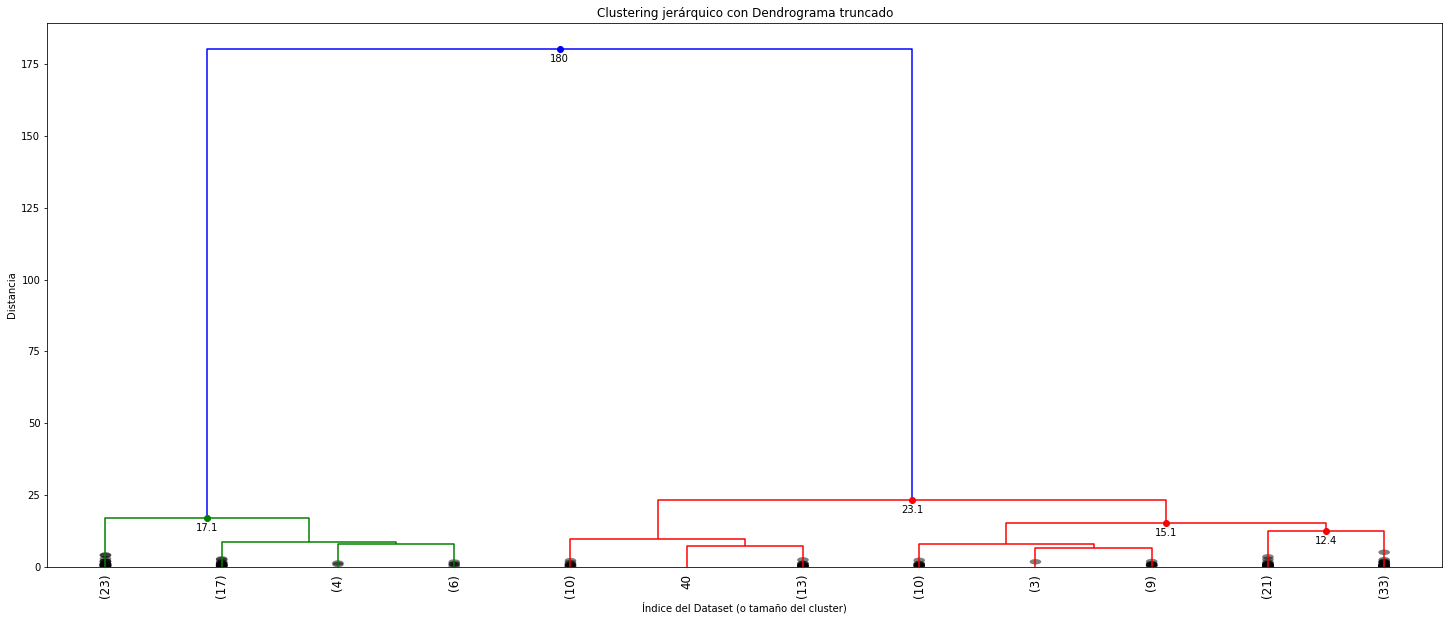

In [376]:
# llama a la dendrogram_tune(args) sin el argumento max_d
dendrogram_tune(z, truncate_mode = 'lastp', p=12,
                leaf_rotation = 90., leaf_font_size = 12., show_contracted = True,
                annotate_above = 10)
plt.show()

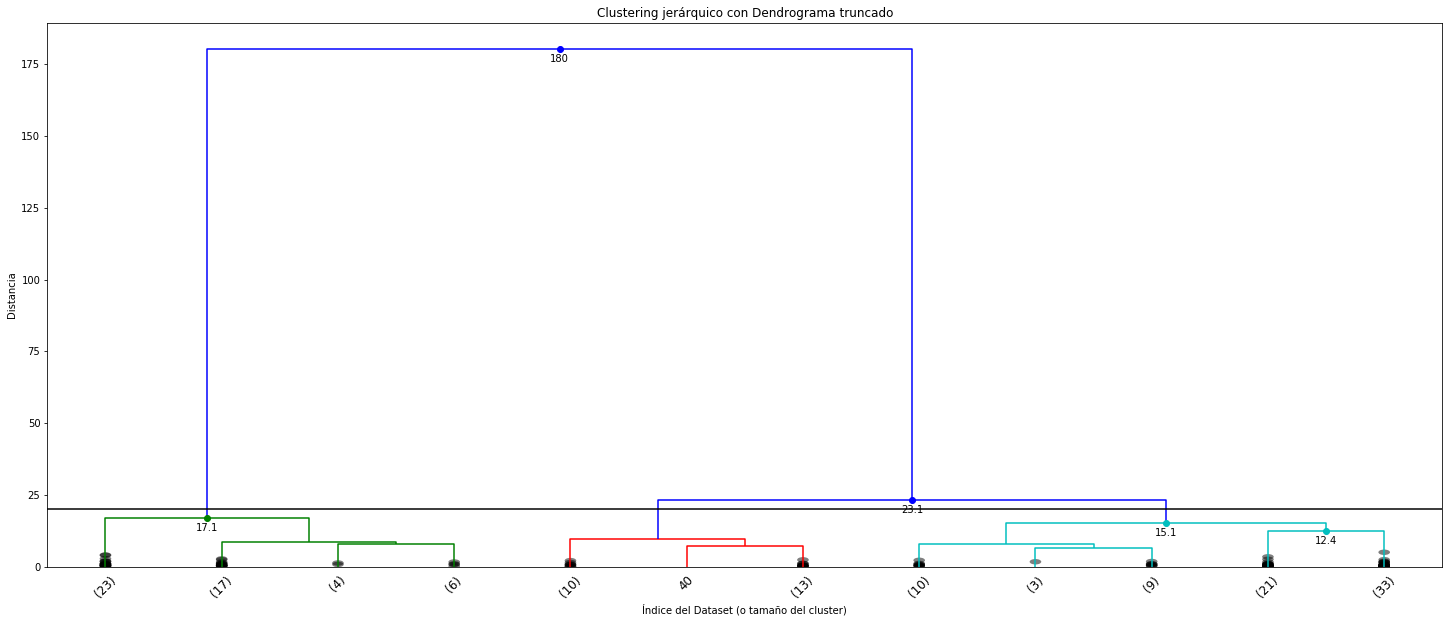

In [379]:
# llama a la dendrogram_tune(args) con el argumento max_d = 20
dendrogram_tune(z, truncate_mode = 'lastp', p=12,
                leaf_rotation = 45., leaf_font_size = 12., show_contracted = True,
                annotate_above = 10, max_d = 20)
plt.show()            

**Nota de implementación:** El uso de `.pop()` y `.get()` en un diccionario. En el caso anterior se aplica a la lista (diccionario) de los argumentos recibidos por la función `dendrogram_tune(*args, **kwargs)`.

**get(key[, default]):** return the value for key if key is in the dictionary, else default. If default is not given, it defaults to None, so that this method never raises a KeyError.

`
d = {'a' :1, 'c' :2}
print(d.get('b', 0)) # return 0
print(d.get('c', 0)) # return 2
`

**pop(key[, default]):** if key is in the dictionary, remove it and return its value, else return default. If default is not given and key is not in the dictionary, a KeyError is raised.

`
d = {'a' :1, 'c' :2}
print(d.pop('c', 0)) # return 2
print(d) # returns {'a': 1}
print(d.get('c', 0)) # return 0
`

### Corte automático del dendrograma
Determinar el número de clusters en un dataset, denominado como el valor $k$, es un  problema común cuando se hace agrupamientos. 

#### Método de la incosistencia

Existen varios métodos para encontrar el valor $k$, uno de estos es el método de la inconsistencia.
Por medio del cálculo del factor de inconsistencia:
$$inconsisntency_i = h_i-\frac{avg(h_j)}{std(h_j)}$$
Se obtiene la altura a la cual hacer el corte y determinar el número de clusters.

In [382]:
from scipy.cluster.hierarchy import inconsistent

In [383]:
depth = 5
incons = inconsistent(z,depth)
incons

array([[4.15105485e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.91375926e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.10677929e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.13712071e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.54313099e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.09277896e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.10071548e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.13022407e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.14289714e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21200766e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21671017e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.24900190e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.40277358e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21833664e-01, 7.17937830e-02, 2.00000000e

La **matriz de incosistencia** muestra el promedio, desviación estandar, número de elementos y el factor de incosistencia de las uniones.

In [384]:
incons[-10:]

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

El factor de inconsistencia muestra un factor de cambio de las distancias en las que se han hecho agrupaciones. El mayor valor de incostistencia determina un corte, no obstante este valor depende mucho del valor de la **profundidad** con la que se construyó la matriz de incosistencia.

#### El método del codo

Un método alternativo es el **método del codo** en el cual se intenta determinar el paso del clusterin en el cual el incremento de la distancia de agrupamiento es el mayor. Por medio del cálculo de la diferencia de los crecimientos (decrecimientos) determina la aceleraración de las distancias de agrupamiento. 

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


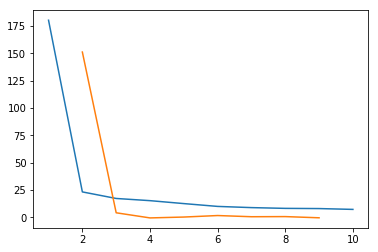

El número óptimo de clusters es: 2


In [398]:
last = z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

# calcula las aceleraciones
acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax()+ 2
print('El número óptimo de clusters es: %s'%str(k) ) 

In [390]:
last_rev

array([180.27043021,  23.12198936,  17.11527362,  15.11533118,
        12.42734657,   9.84427829,   8.74822275,   8.04935282,
         7.86878542,   7.11106083])

La línea naranja muestra la rapidez con la que cambian las distancias de agrupación, mostrando que la mayor agrupación está en dos clusters.

La conclusión inicial del método del codo determina que ningún conjunto de datos se describe en un único cluster. Por otra parte, es posible que el mayor cambio en las distancias de agrupación no esté al final, por tanto es necesario calcular todas las variaciones en las distancias de agrupamiento. 

### Ejemplo 2

Vamos a crear tres nuevos clusters lejanos a los anteriores y más dispersión entre sus puntos. Con esto, los agrupamientos interclusters tendrán saltos notorios debido a mayores distancias de agrupamiento.

In [435]:
# crea nuevos clusters aleatorios de puntos
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size = [200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size = [200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size = [200,])

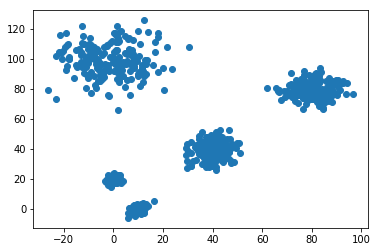

In [439]:
# une los clusters anteriores con los nuevos
x2 = np.concatenate((x,c,d,e),)
plt.scatter(x2[:,0],x2[:,1])
plt.show()

In [441]:
z2 = linkage(x2,"ward")

<Figure size 720x720 with 0 Axes>

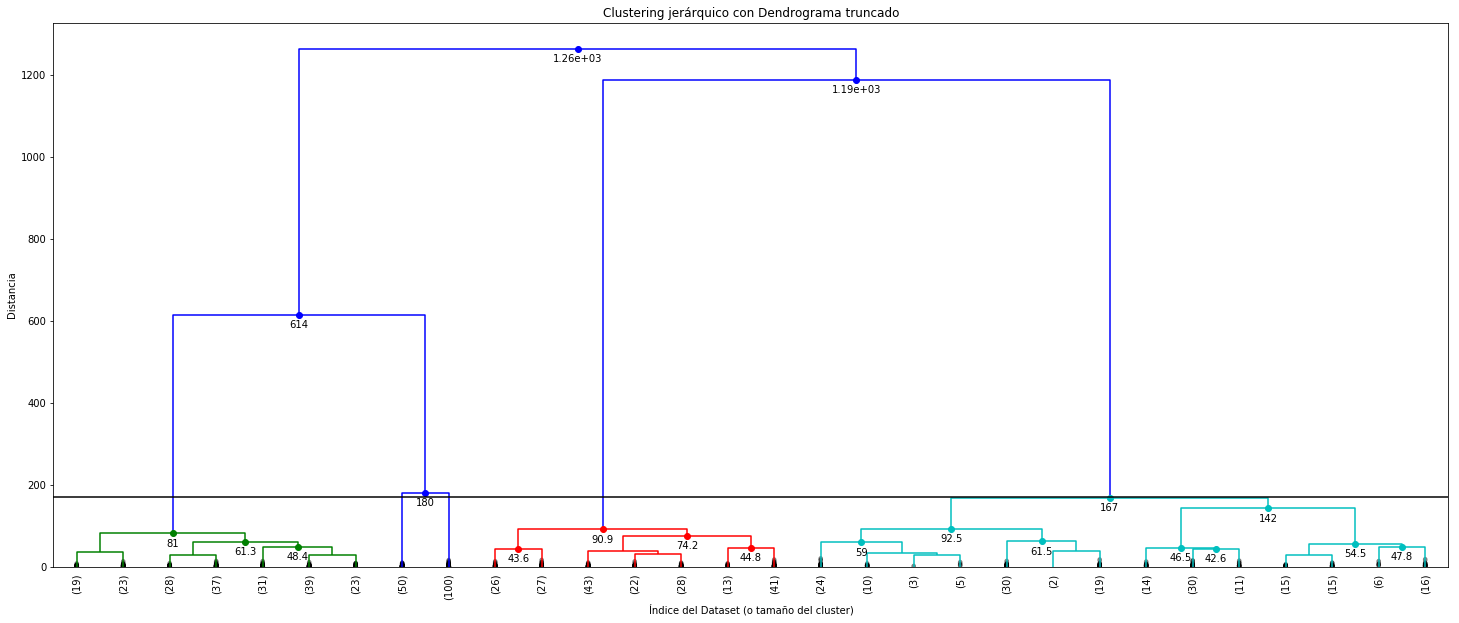

In [442]:
plt.figure(figsize=(10,10))
dendrogram_tune(z2, truncate_mode = 'lastp',
                p = 30, leaf_rotation = 90., 
                leaf_font_size = 10.,
                show_contracted = True,
                annotate_above = 40,
                max_d = 170)
plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


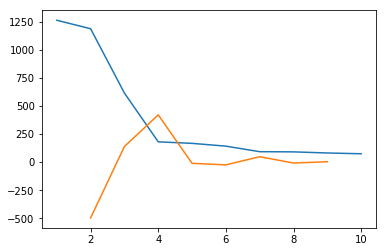

El número óptimo de clusters es: 4


In [443]:
last = z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

# calcula las aceleraciones
acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax()+ 2
print('El número óptimo de clusters es: %s'%str(k) ) 

Por la distribución de los datos sería inmediato asumir un número óptimo de clusters es 5, sin embargo la técnica del codo permite concluir que el número óptimo es 4. La dimensión de las distancias de agrupamiento aumentó con lo que la distancia que se había calculado en el ejemplo anterior queda sin relevancia y se agrupan ambos clusters en uno solo.

### Recuperar los clusters y sus elementos

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [445]:
# crea los clusters considerando distancia
max_d = 20
clusters = fcluster(z, max_d, criterion = 'distance')
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [447]:
# crea los clusters considerando el número de clusters
k = 3
clusters = fcluster(z, k, criterion = 'maxclust')
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [448]:
# crea los clusters considerando la distancia y profundidad en la matriz de inconsistencia
fcluster(z, 8, depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

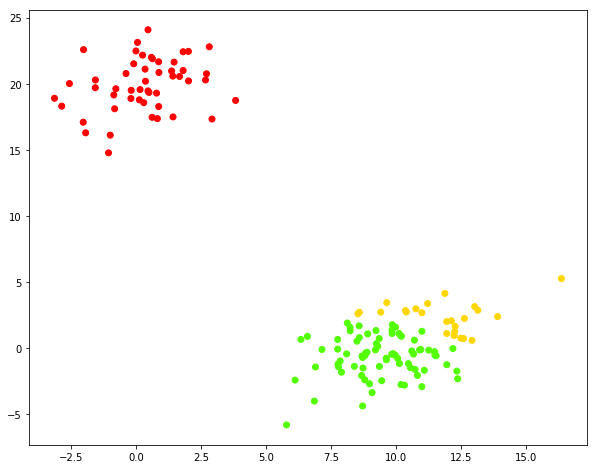

In [450]:
# pinta los puntos del primer ejemplo

plt.figure(figsize = (10,8))
plt.scatter(x[:,0],x[:,1], c = clusters, cmap = 'prism') 
# crea los clusters considerando distancia
max_d = 20
clusters = fcluster(z, max_d, criterion = 'distance')
clustersplt.show()

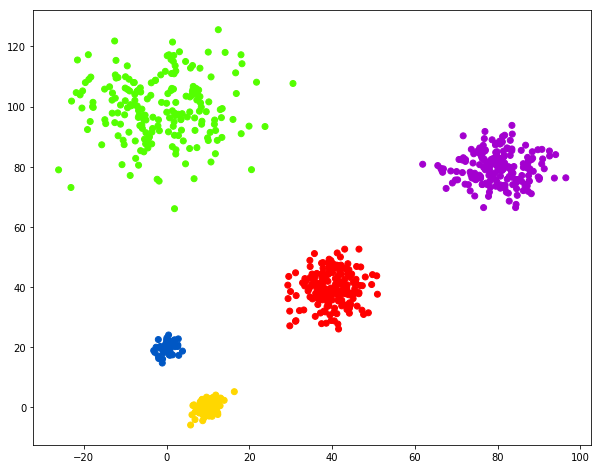

In [454]:
# pinta los puntos del segundo ejemplo

# crea los clusters considerando distancia de corte 180
max_d = 180
clusters = fcluster(z2, max_d, criterion = 'distance')
clusters

# pinta los puntos del segundo ejemplo
plt.figure(figsize = (10,8))
plt.scatter(x2[:,0],x2[:,1], c = clusters, cmap = 'prism') 
plt.show()